In [1]:
from collections import OrderedDict
import numpy as np
import pandas as pd
import numpy as np

from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric

from sklearn.linear_model import LogisticRegression as LG

from GenBalance import *

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [2]:
df_to_balance = pd.read_csv("compas_trn_pdf_0.csv")
df_test = pd.read_csv("compas_tst_pdf_0.csv")
all_metrics = 0
df_to_balance = pd.DataFrame(data=df_to_balance, columns=df_to_balance.columns)

In [3]:
attr = 'sex'
class_name = 'Probability'
weighted_indexes = []
integer_indexes = []
random_indexes = []
regular_indexes = []
model = LG(C=0.2, penalty='l2', solver='liblinear', max_iter=1000) #Model used for Preferential Sampling
attributes = [col for col in df_to_balance.columns if col != class_name]


privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]

In [4]:
print ("Class Balance of Dataset:")
sum(df_to_balance['Probability'])/len(df_to_balance['Probability'])

Class Balance of Dataset:


0.4479293016808179

Disc: -0.10681879622768475
1.0 is discriminated
DP: Always added
PP: Maybe removed
- Budget aka Positive Record to Add: 601 6372 
- PP to add: 296 
- DP to add: 305 
- Disc: 0.0
GA started, 305 individual(s) will be generated
gen	nevals	max         	min     	avg     
0  	150   	[0.91484238]	0.171632	0.604783
1  	78    	[0.91484238]	0.171632	0.603807
2  	93    	[0.92936351]	0.171632	0.60538 
3  	87    	[0.92936351]	0.155001	0.599228
4  	90    	[0.93058099]	0.148469	0.602792
5  	97    	[0.93058099]	0.148469	0.600446
6  	101   	[0.93058099]	0.150244	0.597899
7  	88    	[0.93295089]	0.148469	0.598356
8  	78    	[0.92384661]	0.148469	0.599374
9  	89    	[0.93682408]	0.139588	0.596595
10 	78    	[0.93682408]	0.151425	0.594308
11 	93    	[0.93161134]	0.141726	0.597532
12 	98    	[0.93235362]	0.133202	0.604259
13 	90    	[0.93235362]	0.140422	0.603001
14 	85    	[0.93235362]	0.140422	0.598364
15 	84    	[0.93235362]	0.145962	0.594503
16 	91    	[0.93235362]	0.139712	0.59265 
17 	75    	[0.9228

<Figure size 640x480 with 0 Axes>

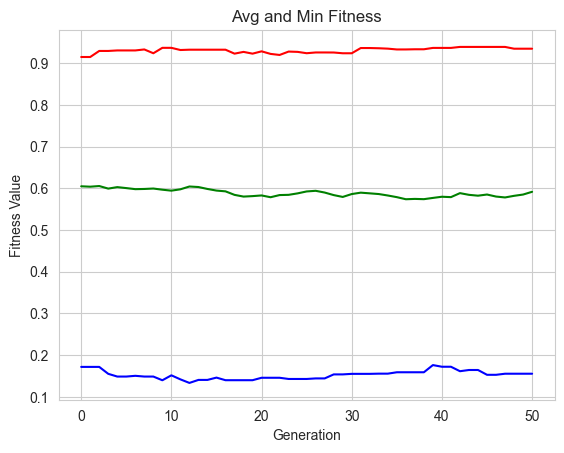

GA started, 296 individual(s) will be generated
gen	nevals	max         	min     	avg     
0  	150   	[0.95184794]	0.254504	0.682159
1  	96    	[0.95184794]	0.247708	0.684746
2  	70    	[0.96649905]	0.247708	0.684205
3  	80    	[0.96649905]	0.247708	0.683989
4  	70    	[0.96765528]	0.244445	0.683094
5  	87    	[0.96912516]	0.244445	0.682688
6  	94    	[0.96912516]	0.223604	0.678619
7  	82    	[0.97019355]	0.223604	0.681198
8  	81    	[0.97019355]	0.223604	0.675836
9  	88    	[0.97122357]	0.218464	0.66975 
10 	91    	[0.97026968]	0.217786	0.675033
11 	81    	[0.97019355]	0.178388	0.67197 
12 	78    	[0.97040246]	0.178388	0.672633
13 	105   	[0.97103502]	0.175164	0.667995
14 	81    	[0.97123821]	0.173943	0.671826
15 	83    	[0.96784818]	0.173943	0.670375
16 	95    	[0.96784818]	0.173943	0.674553
17 	92    	[0.97254122]	0.20383 	0.674843
18 	85    	[0.97254122]	0.20383 	0.673703
19 	79    	[0.97254122]	0.20383 	0.675526
20 	87    	[0.97119025]	0.20383 	0.679441
21 	88    	[0.97119025]	0.19

<Figure size 640x480 with 0 Axes>

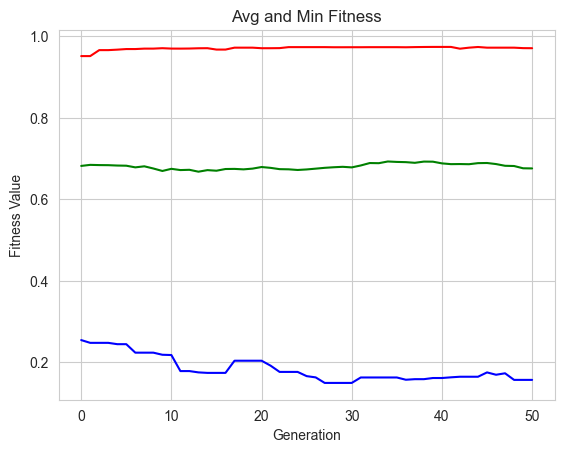

In [5]:
GB = GenBalance(df_to_balance, attr, class_name, weighted_indexes, integer_indexes, 
                random_indexes, regular_indexes, model)
df_balanced = GB.fit()

In [6]:
print ("Class Balance of Dataset:")
sum(df_balanced['Probability'])/len(df_balanced['Probability'])
#The two classes are now balanced

Class Balance of Dataset:


0.5

In [7]:
GB = GenBalance(df_balanced, attr, class_name, weighted_indexes, integer_indexes, 
                random_indexes, regular_indexes, model)
df_balanced_ = GB.fit()

#Discrimination = 0, the dataset is now fair

Disc: 0.0
No discrimination


In [8]:
def compute_metrics(dataset_true, dataset_pred, 
                    unprivileged_groups, privileged_groups,
                    disp = True):
    """ Compute the key metrics """
    classified_metric_pred = ClassificationMetric(dataset_true,
                            dataset_pred, 
                            unprivileged_groups=unprivileged_groups,
                            privileged_groups=privileged_groups)
    metrics = OrderedDict()
    metrics["Balanced accuracy"] = 0.5*(classified_metric_pred.true_positive_rate()+
                            classified_metric_pred.true_negative_rate())
    
    metrics["Average odds difference"] = classified_metric_pred.average_odds_difference()
    
    metrics["Absolute average odds difference"] = classified_metric_pred.average_abs_odds_difference()
    metrics["True positive rate difference"] = classified_metric_pred.true_positive_rate_difference()
    #metrics["True negative rate difference"] = classified_metric_pred.true_negative_rate_difference()
    
    metrics["Equal opportunity difference"] = classified_metric_pred.equal_opportunity_difference()
    
    #metrics["Fair utility"] = metrics["Balanced accuracy"] * .5 * \
     #   ((1-np.abs(metrics["True positive rate difference"])) + \
      #   (1-np.abs(metrics["True negative rate difference"])))
    
    if disp:
        for k in metrics:
            print("%s = %.4f" % (k, metrics[k]))
    
    return metrics

In [9]:
X_train = df_to_balance[attributes].values
y_train = df_to_balance[class_name].to_list()

model.fit(X_train, y_train)

X_test = df_test[attributes].values
y_test = df_test[class_name].to_list()

preds = model.predict(X_test)

df_pred = df_test.copy()
df_pred['Probability'] = preds

bld_test = BinaryLabelDataset(df=df_test, label_names=['Probability'],
        protected_attribute_names=['sex'])
bld_pred = BinaryLabelDataset(df=df_pred, label_names=['Probability'],
        protected_attribute_names=['sex'])

metrics_t = compute_metrics(bld_test, bld_pred,
                unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)

Balanced accuracy = 0.6650
Average odds difference = 0.1836
Absolute average odds difference = 0.1836
True positive rate difference = 0.2301
Equal opportunity difference = 0.2301
